In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import pathlib

## Loading data

In [2]:
directory_path = '../../04_-_Dev/videos'
features = 'eGeMAPS'

In [3]:
#currentDirectory = pathlib.Path(directory_path)
#currentPattern = "*." + features + ".annotated.csv"
#file_list = [str(currentFile) for currentFile in currentDirectory.glob(currentPattern)]
#file_list

In [4]:
#df_total = pd.DataFrame()
#for filename in file_list:
#    df = pd.read_csv(filename, delimiter=';')
#    df_total = pd.concat([df_total, df], axis=0)


In [5]:
#print('Number of videos', df_total['video_name'].nunique())
#print('Number of annotations', df_total[['video_name','diapo']].drop_duplicates().shape[0])

In [6]:
#df_total.to_pickle(directory_path + '/audio_' + features + '_data.p')

In [7]:
#df_total.loc[df_total.isna().any(axis=1),'frameTime'].value_counts()

In [8]:
#df_total = df_total.dropna(axis=0)

In [3]:
df_total = pd.read_pickle(directory_path + '/audio_' + features + '_data.p')

In [4]:
df_total.shape

(2573581, 77)

In [5]:
time_window = 5
df_total['frameTimeWindow'] = df_total.frameTime.apply(lambda x : np.floor(x / time_window) * time_window).astype(int)

In [6]:
df_total.frameTimeWindow.value_counts().sort_index()

0       14940
5       15000
10      15000
15      15000
20      15000
        ...  
1100      500
1105      500
1110      500
1115      500
1120      359
Name: frameTimeWindow, Length: 225, dtype: int64

## Data exploration

In [13]:
df_total.groupby('diapo').agg({'frameTime':'mean'})


,frameTime
diapo,
1,99.359963
8,195.661667
9,270.161667
10,353.161667
11,434.661667
12,568.660055
17,659.128333
18,784.525699


In [14]:
df_stats_stress_global = df_total[['video_name','stress_global']].drop_duplicates()['stress_global'].value_counts().sort_index()
df_stats_stress_global


0.0    12
1.0    10
2.0     8
Name: stress_global, dtype: int64

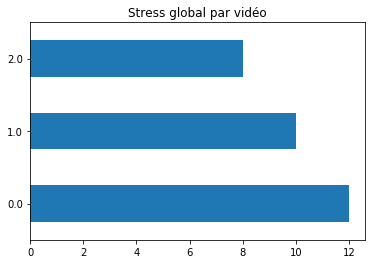

In [15]:
df_stats_stress_global.plot(kind='barh', title='Stress global par vidéo');


In [16]:
df_stats_stress = df_total[['video_name','diapo','stress']].drop_duplicates()['stress'].value_counts().sort_index()
df_stats_stress

0.0    101
1.0    113
2.0     25
3.0      1
Name: stress, dtype: int64

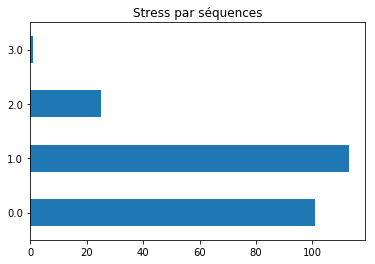

In [17]:
df_stats_stress.plot(kind='barh', title='Stress par séquences');

In [18]:
df_stats_stress_diapo = df_total[['video_name','diapo','stress']].drop_duplicates()[['diapo','stress']].groupby(['diapo','stress']).agg({'stress':'count'}).sort_index().unstack(fill_value=0)
df_stats_stress_diapo

stress            
stress    0.0 1.0 2.0 3.0
diapo                    
1          17  11   2   0
8          16  10   4   0
9          11  15   4   0
10         12  15   3   0
11         13  13   3   1
12          9  18   3   0
17         16  13   1   0
18          7  18   5   0

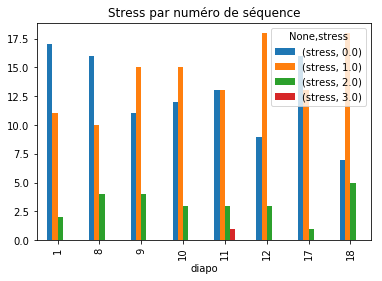

In [19]:
df_stats_stress_diapo.plot(kind='bar', title='Stress par numéro de séquence');

## Data pre-processing 1 - Sans utilisation de la temporalité

In [8]:
from scipy.stats import kurtosis, skew

def percentil25(x): 
    return np.percentile(x, q=25)

def percentil75(x): 
    return np.percentile(x, q=75)

In [22]:
# 5 seconds windows
X = df_total.iloc[:,2:].groupby(['video_name','diapo','frameTimeWindow']).agg({'mean','min','max', 'median', 'std', percentil25, percentil75, kurtosis, skew}).iloc[:,:-18]

In [23]:
X.columns

MultiIndex([(                   'Loudness_sma3',         'min'),
            (                   'Loudness_sma3',    'kurtosis'),
            (                   'Loudness_sma3',        'mean'),
            (                   'Loudness_sma3',         'std'),
            (                   'Loudness_sma3',         'max'),
            (                   'Loudness_sma3', 'percentil75'),
            (                   'Loudness_sma3',        'skew'),
            (                   'Loudness_sma3',      'median'),
            (                   'Loudness_sma3', 'percentil25'),
            (                 'alphaRatio_sma3',         'min'),
            ...
            (   'F3amplitudeLogRelF0_sma3nz_de', 'percentil25'),
            ('F3amplitudeLogRelF0_sma3nz_de_de',         'min'),
            ('F3amplitudeLogRelF0_sma3nz_de_de',    'kurtosis'),
            ('F3amplitudeLogRelF0_sma3nz_de_de',        'mean'),
            ('F3amplitudeLogRelF0_sma3nz_de_de',         'std'),
         

In [24]:
X

Loudness_sma3            \
                                                          min  kurtosis   
video_name                diapo frameTimeWindow                           
Test_pour_AFPA            1     0                    0.108240  0.022023   
                                5                    0.109675  1.101698   
                                10                   0.105259  1.637765   
                                15                   0.110818  0.320136   
                                20                   0.108863 -0.354434   
...                                                       ...       ...   
WIN_20210417_14_53_12_Pro 18    600                  0.001034  0.763651   
                                605                  0.001034 -0.688585   
                                610                  0.001034 -0.403783   
                                615                  0.001102  0.655261   
                                620                  0.033513  1.970743   

                                                                               \
                                                     mean       std       max   
video_name                diapo frameTimeWindow                                 
Test_pour_AFPA            1     0                0.114774  0.002580  0.123974   
                                5                0.115736  0.002815  0.127661   
                                10               0.113579  0.003511  0.125830   
                                15               0.118081  0.002994  0.128375   
                                20               0.118637  0.003337  0.126731   
...                                                   ...       ...       ...   
WIN_20210417_14_53_12_Pro 18    600              0.032633  0.036212  0.183413   
                                605              0.024742  0.018413  0.078965   
                                610              0.025769  0.020800  0.094043   
                                615              0.045493  0.012051  0.078696   
                                620              0.051241  0.006276  0.068639   

                                                                       \
                                                percentil75      skew   
video_name                diapo frameTimeWindow                         
Test_pour_AFPA            1     0                  0.116547  0.012275   
                                5                  0.117393  0.713457   
                                10                 0.115056  0.917789   
                                15                 0.119927  0.307721   
                                20                 0.121091 -0.395910   
...                                                     ...       ...   
WIN_20210417_14_53_12_Pro 18    600                0.051879  1.222678   
                                605                0.037869  0.391991   
                                610                0.040993  0.554724   
                                615                0.052893 -0.616833   
                                620                0.054039 -0.340928   

                                                                       \
                                                   median percentil25   
video_name                diapo frameTimeWindow                         
Test_pour_AFPA            1     0                0.114900    0.112972   
                                5                0.115328    0.113882   
                                10               0.113245    0.111469   
                                15               0.117924    0.116204   
                                20               0.119101    0.116397   
...                                                   ...         ...   
WIN_20210417_14_53_12_Pro 18    600              0.017399    0.001687   
                                605              0.024232    0.008823   
                                610 

In [25]:
X.sort_index()

Loudness_sma3            \
                                                          min  kurtosis   
video_name                diapo frameTimeWindow                           
Test_pour_AFPA            1     0                    0.108240  0.022023   
                                5                    0.109675  1.101698   
                                10                   0.105259  1.637765   
                                15                   0.110818  0.320136   
                                20                   0.108863 -0.354434   
...                                                       ...       ...   
WIN_20210417_14_53_12_Pro 18    600                  0.001034  0.763651   
                                605                  0.001034 -0.688585   
                                610                  0.001034 -0.403783   
                                615                  0.001102  0.655261   
                                620                  0.033513  1.970743   

                                                                               \
                                                     mean       std       max   
video_name                diapo frameTimeWindow                                 
Test_pour_AFPA            1     0                0.114774  0.002580  0.123974   
                                5                0.115736  0.002815  0.127661   
                                10               0.113579  0.003511  0.125830   
                                15               0.118081  0.002994  0.128375   
                                20               0.118637  0.003337  0.126731   
...                                                   ...       ...       ...   
WIN_20210417_14_53_12_Pro 18    600              0.032633  0.036212  0.183413   
                                605              0.024742  0.018413  0.078965   
                                610              0.025769  0.020800  0.094043   
                                615              0.045493  0.012051  0.078696   
                                620              0.051241  0.006276  0.068639   

                                                                       \
                                                percentil75      skew   
video_name                diapo frameTimeWindow                         
Test_pour_AFPA            1     0                  0.116547  0.012275   
                                5                  0.117393  0.713457   
                                10                 0.115056  0.917789   
                                15                 0.119927  0.307721   
                                20                 0.121091 -0.395910   
...                                                     ...       ...   
WIN_20210417_14_53_12_Pro 18    600                0.051879  1.222678   
                                605                0.037869  0.391991   
                                610                0.040993  0.554724   
                                615                0.052893 -0.616833   
                                620                0.054039 -0.340928   

                                                                       \
                                                   median percentil25   
video_name                diapo frameTimeWindow                         
Test_pour_AFPA            1     0                0.114900    0.112972   
                                5                0.115328    0.113882   
                                10               0.113245    0.111469   
                                15               0.117924    0.116204   
                                20               0.119101    0.116397   
...                                                   ...         ...   
WIN_20210417_14_53_12_Pro 18    600              0.017399    0.001687   
                                605              0.024232    0.008823   
                                610 

In [26]:
#X = X.drop( ['type_candidat','sexe'],axis=1)

In [27]:
#X_temp = df_total[['video_name','diapo','frameTimeWindow','type_candidat','sexe']].groupby(['video_name','diapo','frameTimeWindow']).agg({'type_candidat':'first','sexe':'first'})
#X_temp.loc[X_temp['type_candidat'] == 'Stagiaire','Stagiaire'] = 1
#X_temp.loc[X_temp['type_candidat'] != 'Stagiaire','Stagiaire'] = 0
#X_temp.loc[X_temp['sexe'] == 'F','Femme'] = 1
#X_temp.loc[X_temp['sexe'] != 'F','Femme'] = 0
#X_temp = X_temp.drop(['type_candidat','sexe'], axis=1)

In [28]:
#X_temp

In [29]:
#X = pd.concat([X,X_temp],axis=1)

In [30]:
#X

In [31]:
#y = df_total.iloc[:,2:].groupby(['video_name','diapo']).agg({'stress':'mean'}).iloc[:,-1]

In [32]:
y = df_total.iloc[:,3:].groupby(['video_name','diapo','frameTimeWindow']).agg({'stress':'min'}).iloc[:,-1]

In [33]:
y.value_counts()

1.0    2590
0.0    2064
2.0     653
3.0      20
Name: stress, dtype: int64

In [34]:
df_total[df_total.video_name == 'Test_pour_AFPA']

,frameIndex,frameTime,Loudness_sma3,alphaRatio_sma3,hammarbergIndex_sma3,slope0-500_sma3,slope500-1500_sma3,spectralFlux_sma3,mfcc1_sma3,mfcc2_sma3,...,F3frequency_sma3nz_de_de,F3amplitudeLogRelF0_sma3nz_de,F3amplitudeLogRelF0_sma3nz_de_de,video_name,stress_global,type_candidat,sexe,stress,diapo,frameTimeWindow
2,2,0.02,0.115323,1.264397,4.724082,0.014298,0.002938,0.011240,-1.139930,0.222861,...,-49.057,0.0,0.0,Test_pour_AFPA,1.0,Stagiaire,H,1.0,1,0
3,3,0.03,0.114323,1.232696,4.114583,0.006958,0.000212,0.011262,-1.320929,0.178651,...,37.929,0.0,0.0,Test_pour_AFPA,1.0,Stagiaire,H,1.0,1,0
4,4,0.04,0.112190,0.754823,4.991586,0.018716,0.004506,0.011102,0.045162,1.402770,...,-25.959,0.0,0.0,Test_pour_AFPA,1.0,Stagiaire,H,1.0,1,0
5,5,0.05,0.114955,1.207438,4.493402,0.024434,0.006364,0.009986,-0.012135,0.673018,...,19.461,0.0,0.0,Test_pour_AFPA,1.0,Stagiaire,H,1.0,1,0
6,6,0.06,0.116704,0.903964,4.713356,0.034081,0.005797,0.009539,0.428895,-0.219955,...,-25.492,0.0,0.0,Test_pour_AFPA,1.0,Stagiaire,H,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92064,92064,920.64,0.114091,0.776914,4.055437,0.008927,0.001661,0.010753,0.106011,-0.823886,...,36.231,0.0,0.0,Test_pour_AFPA,1.0,Stagiaire,H,1.0,18,920
92065,92065,920.65,0.113893,-0.463324,5.940565,0.006887,0.001033,0.010604,1.223584,1.795630,...,-10.890,0.0,0.0,Test_pour_AFPA,1.0,Stagiaire,H,1.0,18,920
92066,92066,920.66,0.113770,-0.097732,5.649435,-0.000585,0.003372,0.010626,0.492639,1.345595,...,-6.130,0.0,0.0,Test_pour_AFPA,1.0,Stagiaire,H,1.0,18,920
92067,92067,920.67,0.113942,0.360043,5.977117,0.005276,0.004025,0.009583,0.218933,0.740404,...,17.327,0.0,0.0,Test_pour_AFPA,1.0,Stagiaire,H,1.0,18,920


In [35]:
X.to_pickle(directory_path + '/audio_' + features + '_tw5_data_X.p')
y.to_pickle(directory_path + '/audio_' + features + '_tw5_data_y.p')

In [9]:
from scipy.stats import kurtosis, skew
X_audio = df_total.loc[df_total['diapo'].isin([8, 9, 10, 11, 17]),:].iloc[:,2:].groupby(['video_name','diapo','frameTimeWindow']).agg({'mean','min','max', 'median', 'std', percentil25, percentil75, kurtosis, skew}).iloc[:,:-18]
y_audio = df_total.loc[df_total['diapo'].isin([8, 9, 10, 11, 17]),:].iloc[:,2:].groupby(['video_name','diapo','frameTimeWindow']).agg({'stress':'mean'}).iloc[:,-1]


In [10]:
X_audio.to_pickle(directory_path + '/audio_' + features + '_tw5_data_X_audio_questions_only.p')
y_audio.to_pickle(directory_path + '/audio_' + features + '_tw5_data_y_audio_questions_only.p')

In [11]:
X_audio

Loudness_sma3            \
                                                          std      skew   
video_name                diapo frameTimeWindow                           
Test_pour_AFPA            8     170                  0.004260  0.622063   
                                175                  0.171903  7.899540   
                                180                  0.151311  2.666126   
                                185                  0.524094  0.729256   
                                190                  0.460575  0.901794   
...                                                       ...       ...   
WIN_20210417_14_53_12_Pro 17    490                  0.710146  0.838450   
                                495                  0.579125  0.771330   
                                500                  0.649895  2.217419   
                                505                  0.004583  3.637088   
                                510                  0.000042  0.481472   

                                                                     \
                                                   median       max   
video_name                diapo frameTimeWindow                       
Test_pour_AFPA            8     170              0.117952  0.132053   
                                175              0.121089  2.000975   
                                180              0.114357  0.889735   
                                185              0.766889  2.655899   
                                190              0.688319  2.867280   
...                                                   ...       ...   
WIN_20210417_14_53_12_Pro 17    490              0.955319  3.344785   
                                495              0.784014  2.721339   
                                500              0.011762  3.097884   
                                505              0.001099  0.032650   
                                510              0.001091  0.001169   

                                                                       \
                                                percentil75       min   
video_name                diapo frameTimeWindow                         
Test_pour_AFPA            8     170                0.120691  0.108892   
                                175                0.125652  0.106997   
                                180                0.215082  0.103347   
                                185                1.137554  0.116312   
                                190                1.044864  0.107790   
...                                                     ...       ...   
WIN_20210417_14_53_12_Pro 17    490                1.521639  0.048988   
                                495                1.223141  0.027308   
                                500                0.556316  0.001036   
                                505                0.001169  0.001034   
                                510                0.001122  0.001036   

                                                                        \
                                                  kurtosis percentil25   
video_name                diapo frameTimeWindow                          
Test_pour_AFPA            8     170               0.061981    0.115424   
                                175              69.433110    0.115221   
                                180               7.147944    0.110418   
                                185               0.187311    0.441915   
                                190               1.686311    0.428902   
...                                                    ...         ...   
WIN_20210417_14_53_12_Pro 17    490               0.207985    0.563528   
                                495               0.247044    0.418666   
                                500               4.612967    0.001589   
                                505              14.988611    0.001065   
                 

## Modèles

In [5]:
X = pd.read_pickle(directory_path + '/audio_' + features + '_tw5_data_X.p')
y = pd.read_pickle(directory_path + '/audio_' + features + '_tw5_data_y.p')

X_audio = pd.read_pickle(directory_path + '/audio_' + features + '_data_X_audio.p')
y_audio = pd.read_pickle(directory_path + '/audio_' + features + '_data_y_audio.p')

In [4]:
X.shape

(5327, 621)

In [5]:
X = X.fillna(0)

#### All diapos

In [7]:
#video_name_list = X.reset_index().video_name.unique()
#X = X.reset_index()
#y = y.reset_index()

In [8]:
X

video_name diapo frameTimeWindow Loudness_sma3            \
                                                                min  kurtosis   
0                Test_pour_AFPA     1               0      0.108240  0.022023   
1                Test_pour_AFPA     1               5      0.109675  1.101698   
2                Test_pour_AFPA     1              10      0.105259  1.637765   
3                Test_pour_AFPA     1              15      0.110818  0.320136   
4                Test_pour_AFPA     1              20      0.108863 -0.354434   
...                         ...   ...             ...           ...       ...   
5322  WIN_20210417_14_53_12_Pro    18             600      0.001034  0.763651   
5323  WIN_20210417_14_53_12_Pro    18             605      0.001034 -0.688585   
5324  WIN_20210417_14_53_12_Pro    18             610      0.001034 -0.403783   
5325  WIN_20210417_14_53_12_Pro    18             615      0.001102  0.655261   
5326  WIN_20210417_14_53_12_Pro    18             620      0.033513  1.970743   

                                                          ...  \
          mean       std       max percentil75      skew  ...   
0     0.114774  0.002580  0.123974    0.116547  0.012275  ...   
1     0.115736  0.002815  0.127661    0.117393  0.713457  ...   
2     0.113579  0.003511  0.125830    0.115056  0.917789  ...   
3     0.118081  0.002994  0.128375    0.119927  0.307721  ...   
4     0.118637  0.003337  0.126731    0.121091 -0.395910  ...   
...        ...       ...       ...         ...       ...  ...   
5322  0.032633  0.036212  0.183413    0.051879  1.222678  ...   
5323  0.024742  0.018413  0.078965    0.037869  0.391991  ...   
5324  0.025769  0.020800  0.094043    0.040993  0.554724  ...   
5325  0.045493  0.012051  0.078696    0.052893 -0.616833  ...   
5326  0.051241  0.006276  0.068639    0.054039 -0.340928  ...   

     F3amplitudeLogRelF0_sma3nz_de F3amplitudeLogRelF0_sma3nz_de_de           \
                       percentil25                              min kurtosis   
0                              0.0                              0.0     -3.0   
1                              0.0                              0.0     -3.0   
2                              0.0                              0.0     -3.0   
3                              0.0                              0.0     -3.0   
4                              0.0                              0.0     -3.0   
...                            ...                              ...      ...   
5322                           0.0                              0.0     -3.0   
5323                           0.0                              0.0     -3.0   
5324                           0.0                              0.0     -3.0   
5325                           0.0                              0.0     -3.0   
5326                           0.0                              0.0     -3.0   

                                                         
     mean  std  max percentil75 skew median percentil25  
0     0.0  0.0  0.0         0.0  0.0    0.0         0.0  
1     0.0  0.0  0.0         0.0  0.0    0.0         0.0  
2     0.0  0.0  0.0         0.0  0.0    0.0         0.0  
3     0.0  0.0  0.0         0.0  0.0    0.0         0.0  
4     0.0  0.0  0.0         0.0  0.0    0.0         0.0  
...   ...  ...  ...         ...  ...    ...         ...  
5322  0.0  0.0  0.0         0.0  0.0    0.0         0.0  
5323  0.0  0.0  0.0         0.0  0.0    0.0         0.0  
5324  0.0  0.0  0.0         0.0  0.0    0.0         0.0  
5325  0.0  0.0  0.0         0.0  0.0    0.0         0.0  
5326  0.0  0.0  0.0         0.0  0.0    0.0         0.0  

[5327 rows x 624 columns]

In [9]:
parameters = {'n_estimators': [100, 150, 200], 'max_depth':[5, 6, 7, 8, 9,10, 11, 12, 13, 14, 15, 20, 25]}
parameters = {'n_estimators': [50, 100], 'max_depth':[3, 4, 5, 6]}
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
import warnings
warnings.filterwarnings("ignore")

groups = X.reset_index()['video_name']
loo = LeaveOneGroupOut()
cv_loo = loo.split(X, y, groups)
X_no_name = X#.set_index(['video_name','diapo','frameTimeWindow'])
y_no_name = y#.set_index(['video_name','diapo','frameTimeWindow'])

model = RandomForestClassifier(random_state = 42, n_jobs=-1)

clf = GridSearchCV(estimator=model, 
                    param_grid=parameters, 
                    scoring={'accuracy_score' : 'accuracy', 'f1_score' : 'f1_weighted' }, 
                    refit='accuracy_score',
                    cv=cv_loo, verbose=1)
clf.fit(X_no_name, y_no_name)
print('Best results', clf.best_score_)
print('Best params', clf.best_params_)

Fitting 30 folds for each of 8 candidates, totalling 240 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  3.2min finished
Best results 0.49040439724042056
Best params {'max_depth': 3, 'n_estimators': 100}


In [15]:
y_predict = clf.best_estimator_.predict(X_no_name)
df_ypredict = pd.concat([X.reset_index()[['video_name','diapo','frameTimeWindow']],pd.DataFrame(y_predict, columns=['ypredict'])],axis=1)
df_ypredict.to_csv('ypredict_' + features + '_tw5.csv')

In [17]:
f1_score(y,y_predict,average='weighted')

0.5357503135695181

### Audio diapos only

In [12]:
parameters = {'n_estimators': [100, 150, 200], 'max_depth':[5, 6, 7, 8, 9,10, 11, 12, 13, 14, 15, 20, 25]}
parameters = {'n_estimators': [50, 100, 150, 200], 'max_depth':[3, 4, 5, 10, 15, 20, 25]}
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
import warnings
warnings.filterwarnings("ignore")

groups = X_audio.reset_index()['video_name']
loo = LeaveOneGroupOut()
cv_loo = loo.split(X_audio, y_audio, groups)
X_no_name = X_audio
y_no_name = y_audio

model = RandomForestClassifier(random_state = 42, n_jobs=-1)

clf = GridSearchCV(estimator=model, 
                    param_grid=parameters, 
                    scoring={'accuracy_score' : 'accuracy', 'f1_score' : 'f1_weighted' }, 
                    refit='accuracy_score',
                    cv=cv_loo, verbose=1)
clf.fit(X_no_name, y_no_name)
print('Best results', clf.best_score_)
print('Best params', clf.best_params_)

Fitting 30 folds for each of 28 candidates, totalling 840 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed: 13.0min finished
Best results 0.4560287013812964
Best params {'max_depth': 25, 'n_estimators': 50}


In [18]:
print(X_audio.columns[np.argsort(clf.best_estimator_.feature_importances_)[:-20:-1]])

MultiIndex([(             'Loudness_sma3',         'min'),
            (         'spectralFlux_sma3',         'min'),
            (      'hammarbergIndex_sma3', 'percentil25'),
            (                'mfcc3_sma3',      'median'),
            (           'slope0-500_sma3',      'median'),
            (                'mfcc3_sma3',        'mean'),
            (           'slope0-500_sma3', 'percentil25'),
            (           'slope0-500_sma3',         'min'),
            (                'mfcc4_sma3',      'median'),
            (           'slope0-500_sma3', 'percentil75'),
            (           'slope0-500_sma3',        'mean'),
            (                'mfcc3_sma3', 'percentil25'),
            (           'slope0-500_sma3',         'max'),
            (                'mfcc2_sma3',      'median'),
            ('F1amplitudeLogRelF0_sma3nz', 'percentil75'),
            (                'mfcc4_sma3', 'percentil75'),
            (                'mfcc3_sma3',         'max'

In [19]:
y_predict = clf.best_estimator_.predict(X_no_name)
df_ypredict = pd.concat([X_audio.reset_index()[['video_name','diapo','frameTimeWindow']],pd.DataFrame(y_predict, columns=['ypredict'])],axis=1)
df_ypredict.to_csv('ypredict_' + features + '_tw5_audio_diapos_only.csv')

In [21]:
f1_score(y_audio,y_predict,average='weighted')

1.0